# Validation curve and bias/variance dilemma

In this notebook we would like to discuss the bias/variance dilemma on the example of a decision tree classifier using a data set with failure/success information for data points.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

In [2]:
#defining the data frame
df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
#define variables
X = df[["age","interest"]].values

Y = df["success"].values # single brackets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescaling of training and test data for decision tree is not needed

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9466666666666667


In [12]:
#training the models(s) for a range via the validation_curve function of sklearn
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

param_range = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

train_scores, test_scores = validation_curve(DecisionTreeClassifier(criterion = "entropy"), X, Y, param_name = "max_depth", param_range = param_range)


/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [13]:
#printing the train_scores for the range of 40 neighbors to 1 neighbor:
print(train_scores)

[[1.         0.99494949 1.        ]
 [1.         1.         1.        ]
 [1.         0.98989899 1.        ]
 [1.         0.98989899 1.        ]
 [0.98984772 0.98484848 0.99497487]
 [0.96954315 0.97979798 0.98994975]
 [0.96446701 0.97979798 0.97487437]
 [0.93401015 0.95959596 0.95477387]
 [0.93401015 0.95454545 0.94974874]
 [0.87817259 0.89393939 0.86432161]]


In [14]:
print(test_scores)

[[0.96       0.8989899  0.93877551]
 [0.96       0.88888889 0.93877551]
 [0.95       0.90909091 0.93877551]
 [0.95       0.88888889 0.93877551]
 [0.97       0.88888889 0.93877551]
 [0.96       0.88888889 0.93877551]
 [0.96       0.88888889 0.94897959]
 [0.96       0.91919192 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.87       0.84848485 0.89795918]]


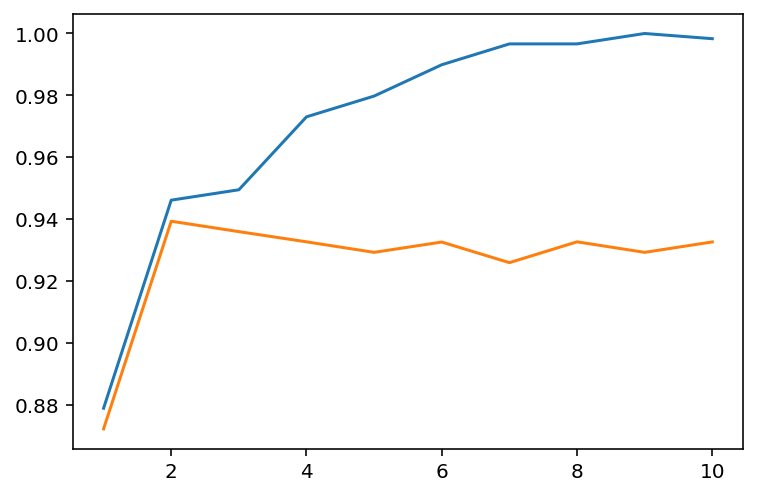

In [15]:
#plotting the score data, however, taking the mean only over values for the same param_range value - therefore axis = 1
plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

plt.show()

Comment: The region towards zero indicates an underfitting as the tree only possesses a small amount of branches. Thus, such a model will generalize to stronlgy without mapping the pecularities of the data set (i.e. the model is biased). This can be tackled with allowing deeper trees at the risk of introducing overfitting (i.e. the model suffers from variance). A depth value of 2 seems ideal for the given data. 

In the following we would like to make an experiment by locking in the depth of the tree to the just found value and repeat the validation curve analysis for the parameter "min_samples_leaf". This parameter represents the minimum number of samples required to be at a leaf node.

In [72]:
#training the models(s) for a range via the validation_curve function of sklearn
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

param_range = np.array([50,45,40,35,30,25,20,19,18,17,16,15,14,13,12,11,10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

train_scores, test_scores = validation_curve(DecisionTreeClassifier(criterion = "entropy", max_depth = 2), X, Y, param_name = "min_samples_leaf", param_range = param_range)


/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [73]:
#printing the train_scores for the range of 40 neighbors to 1 neighbor:
print(train_scores)

[[0.87817259 0.89393939 0.86432161]
 [0.87817259 0.89393939 0.86432161]
 [0.87817259 0.89393939 0.86432161]
 [0.87817259 0.89393939 0.86432161]
 [0.87817259 0.89393939 0.88442211]
 [0.87817259 0.89393939 0.90954774]
 [0.87817259 0.91414141 0.93467337]
 [0.87817259 0.91919192 0.93969849]
 [0.87817259 0.92424242 0.94472362]
 [0.9035533  0.92929293 0.94974874]
 [0.90862944 0.93434343 0.94974874]
 [0.91370558 0.93939394 0.94974874]
 [0.91878173 0.94444444 0.94974874]
 [0.92385787 0.94949495 0.94974874]
 [0.92893401 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]
 [0.93401015 0.95454545 0.94974874]]


In [74]:
print(test_scores)

[[0.87       0.84848485 0.89795918]
 [0.87       0.84848485 0.89795918]
 [0.87       0.84848485 0.89795918]
 [0.87       0.84848485 0.89795918]
 [0.87       0.84848485 0.86734694]
 [0.87       0.84848485 0.90816327]
 [0.87       0.86868687 0.91836735]
 [0.87       0.86868687 0.92857143]
 [0.87       0.86868687 0.92857143]
 [0.94       0.86868687 0.92857143]
 [0.96       0.86868687 0.92857143]
 [0.96       0.87878788 0.92857143]
 [0.96       0.88888889 0.92857143]
 [0.96       0.88888889 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]
 [0.96       0.92929293 0.92857143]]


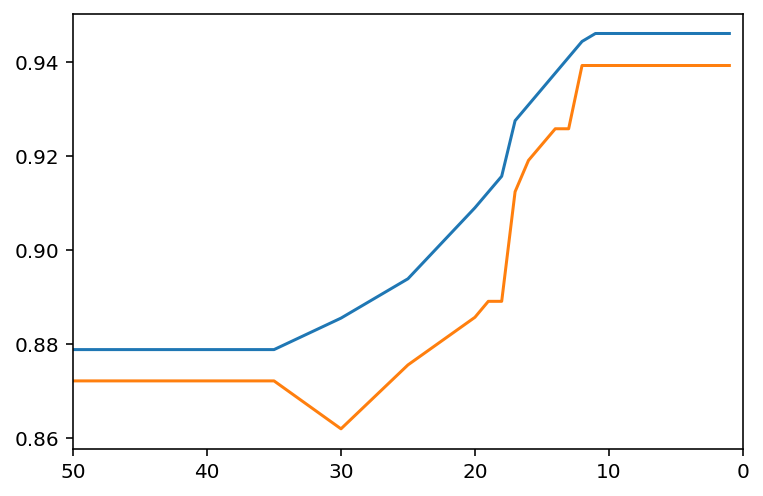

In [75]:
#plotting the score data, however, taking the mean only over values for the same param_range value - therefore axis = 1
plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

#to turn around the X-axis
plt.xlim(np.max(param_range), 0)

plt.show()

Comment: A region between 10 to 1 samples at a leaf node seems to be ideal for the given depth.